In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("data/samples.csv", delimiter=';', encoding='cp1250')

df.head()

columnNames = {"AGE_BEN_SNDS":"Tranche d'Age Bénéficiaire au moment des soins",
"ASU_NAT":"Nature d'Assurance",
"ATT_NAT":"Nature de l'Accident du Travail",
"BEN_CMU_TOP":"Top Bénéficiaire CMU-C",
"BEN_QLT_COD":"Qualité du Bénéficiaire",
"BEN_RES_REG":"Région de Résidence du Bénéficiaire",
"BEN_SEX_COD":"Sexe du Bénéficiaire",
"CPL_COD":"Complément d'Acte",
"CPT_ENV_TYP":"Type d'Enveloppe",
"DDP_SPE_COD":"Discipline de Prestation Etb Exécutant",
"DRG_AFF_NAT":"Nature du Destinataire de Règlement affiné",
"ETE_CAT_SNDS":"Catégorie Etb Exécutant",
"ETE_IND_TAA":"Indicateur TAA Privé/Public",
"ETE_REG_COD":"Région d'Implantation Etb Exécutant",
"ETE_TYP_SNDS":"Type Etb Exécutant",
"ETP_CAT_SNDS":"Catégorie Etb Prescripteur",
"ETP_REG_COD":"Région d'Implantation Etb Prescripteur",
"EXE_INS_REG":"Région du PS Exécutant",
"EXO_MTF":"Motif d'Exonération du Ticket Modérateur",
"FLT_ACT_COG":"Coefficient Global de la Prestation Préfiltré",
"FLT_ACT_NBR":"Dénombrement de la Prestation Préfiltré",
"FLT_ACT_QTE":"Quantité de la Prestation Préfiltrée",
"FLT_DEP_MNT":"Montant du Dépassement de la Prestation Préfiltré",
"FLT_PAI_MNT":"Montant de la Dépense de la Prestation Préfiltrée",
"FLT_REM_MNT":"Montant Versé/Remboursé Préfiltré",
"FLX_ANN_MOI":"Année et Mois de Traitement",
"MDT_TYP_COD":"Mode de Traitement Etb Exécutant",
"MFT_COD":"Mode de Fixation des Tarifs Etb Exécutant",
"MTM_NAT":"Modulation du Ticket Modérateur",
"ORG_CLE_REG":"Région de l'Organisme de Liquidation",
"PRE_INS_REG":"Région du PS Prescripteur",
"PRS_ACT_COG":"Coefficient Global",
"PRS_ACT_NBR":"Dénombrement",
"PRS_ACT_QTE":"Quantité",
"PRS_DEP_MNT":"Montant du Dépassement",
"PRS_FJH_TYP":"Type de Prise en Charge Forfait Journalier",
"PRS_NAT":"Nature de Prestation",
"PRS_PAI_MNT":"Montant de la Dépense ",
"PRS_PDS_QCP":"Code Qualificatif Parcours de Soins (sortie)",
"PRS_PPU_SEC":"Code Secteur Privé/Public",
"PRS_REM_BSE":"Base de Remboursement",
"PRS_REM_MNT":"Montant Versé/Remboursé",
"PRS_REM_TAU":"Taux de Remboursement",
"PRS_REM_TYP":"Type de Remboursement",
"PSE_ACT_CAT":"Catégorie de l' Exécutant",
"PSE_ACT_SNDS":"Nature d'Activité PS Exécutant",
"PSE_SPE_SNDS":"Spécialité Médicale PS Exécutant",
"PSE_STJ_SNDS":"Statut Juridique PS Exécutant",
"PSP_ACT_CAT":"Catégorie du Prescripteur",
"PSP_ACT_SNDS":"Nature d'Activité PS Prescripteur",
"PSP_SPE_SNDS":"Spécialité Médicale PS Prescripteur",
"PSP_STJ_SNDS":"Statut Juridique PS Prescripteur",
"SOI_ANN":"Année de Soins",
"SOI_MOI":"Mois de Soins",
"TOP_PS5_TRG":"Top Périmètre hors CMU C et prestations pour information"
}


regionCode = {
5:"Régions et Départements d'outre-mer",
11:"Ile-de-France",
24:"Centre-Val de Loire",
27:"Bourgogne-Franche-Comté",
28:"Normandie",
32:"Hauts-de-France",
44:"Grand Est",
52:"Pays de la Loire",
53:"Bretagne",
75:"Nouvelle-Aquitaine",
76:"Occitanie",
84:"Auvergne-Rhône-Alpes",
93:"Provence-Alpes-Côte d'Azur et Corse",
99:"Inconnu"
}



In [4]:
df.rename(columns=columnNames, inplace=True)
df.head(100)


,Année et Mois de Traitement,Région de l'Organisme de Liquidation,Tranche d'Age Bénéficiaire au moment des soins,Région de Résidence du Bénéficiaire,Top Bénéficiaire CMU-C,Qualité du Bénéficiaire,Sexe du Bénéficiaire,Discipline de Prestation Etb Exécutant,Catégorie Etb Exécutant,Région d'Implantation Etb Exécutant,...,Catégorie de l' Exécutant,Spécialité Médicale PS Exécutant,Statut Juridique PS Exécutant,Région du PS Prescripteur,Nature d'Activité PS Prescripteur,Catégorie du Prescripteur,Spécialité Médicale PS Prescripteur,Statut Juridique PS Prescripteur,Top Périmètre hors CMU C et prestations pour information,Unnamed: 55
0,201812,53,60,53,0,1,1,0,2206,53,...,0,1,2,99,0,0,1,2,1,NaN
1,201812,84,60,84,0,1,2,121,9999,99,...,1,37,1,44,0,1,37,1,1,NaN
2,201812,11,80,11,0,1,2,121,9999,99,...,1,15,1,11,0,1,15,1,1,NaN
3,201812,11,20,32,0,1,2,121,9999,99,...,3,0,1,32,0,1,5,1,1,NaN
4,201812,24,20,11,0,1,2,121,9999,99,...,2,0,1,11,0,1,7,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,201812,84,70,84,0,1,1,121,9999,99,...,2,0,1,99,0,0,1,2,1,NaN
96,201812,28,80,28,0,1,2,121,9999,99,...,2,0,1,32,0,1,1,1,1,NaN
97,201812,32,40,32,1,1,1,121,9999,99,...,2,0,9,32,0,1,1,9,0,NaN
98,201812,99,30,24,0,1,1,121,9999,99,...,1,15,1,11,0,1,15,1,1,NaN


In [5]:
df["Région de Résidence du Bénéficiaire"] = df["Région de Résidence du Bénéficiaire"].apply(lambda x: regionCode[x])
df["Région d'Implantation Etb Prescripteur"] = df["Région d'Implantation Etb Prescripteur"].apply(lambda x: regionCode[x])
df["Région d'Implantation Etb Exécutant"] = df["Région d'Implantation Etb Exécutant"].apply(lambda x: regionCode[x])
df["Région du PS Exécutant"] = df["Région du PS Exécutant"].apply(lambda x: regionCode[x])
df["Région de l'Organisme de Liquidation"] = df["Région de l'Organisme de Liquidation"].apply(lambda x: regionCode[x])
df["Région du PS Prescripteur"] = df["Région du PS Prescripteur"].apply(lambda x: regionCode[x])





In [141]:
df_population = pd.read_csv("data/Population_2018.csv", delimiter=';', encoding='cp1250')
df_population.head(1000)
#print(df_population)

df_population.head(1000)
df_population["0 ŕ 19 ans"] = pd.to_numeric(df_population["0 ŕ 19 ans"].str.replace(' ',''))
df_population["20 ŕ 39 ans"]= pd.to_numeric(df_population["20 ŕ 39 ans"].str.replace(' ',''))
df_population["40 ŕ 59 ans"] = pd.to_numeric(df_population["40 ŕ 59 ans"].str.replace(' ',''))
df_population["60 ŕ 74 ans"] = pd.to_numeric(df_population["60 ŕ 74 ans"].str.replace(' ',''))
df_population["75 ans et plus"] = pd.to_numeric(df_population["75 ans et plus"].str.replace(' ',''))

df_population["PopulationTotal"] = df_population["0 ŕ 19 ans"] +df_population["20 ŕ 39 ans"]+df_population["40 ŕ 59 ans"] + \
df_population["60 ŕ 74 ans"] + df_population["75 ans et plus"]


df_population.set_index("Régions", inplace=True)

df_population.loc["Provence-Alpes-Côte d'Azur et Corse"] = df_population.loc["Provence-Alpes-Côte d'Azur"] + df_population.loc["Corse"]
df_population.loc["Guadeloupe"] += df_population.loc["Martinique"] + df_population.loc["Guyane"] +df_population.loc["La Réunion"] +df_population.loc["Mayotte"]

#df_population.index = df_population.index.str.replace("Provence-Alpes-Côte d'Azur", "Provence-Alpes-Côte d'Azur et Corse")
df_population.index = df_population.index.str.replace("Guadeloupe", "Régions et Départements d'outre-mer")
df_population = df_population.drop(["Mayotte", "Martinique", "Guyane", "La Réunion"])

print(df_population.index)

Index(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Corse', 'Grand Est', 'Hauts-de-France',
       'Ile-de-France', 'Normandie', 'Nouvelle-Aquitaine', 'Occitanie',
       'Pays de la Loire', 'Provence-Alpes-Côte d'Azur',
       'Régions et Départements d'outre-mer',
       'Provence-Alpes-Côte d'Azur et Corse'],
      dtype='object', name='Régions')


In [7]:
df_medecin = pd.read_csv("data/rpps-medecins18-tab10v3_81357016668524.csv", encoding="cp1250")

df_medecin.set_index("REGION ACTIVITE", inplace=True)
print(df_medecin.columns)

Index(['Ensemble des spécialités d'exercice', 'Spécialistes',
       'Anatomie et cytologie pathologiques', 'Anesthésie-réanimation',
       'Biologie médicale', 'Cardiologie et maladies vasculaires',
       'Chirurgie générale', 'Chirurgie maxillo-faciale et stomatologie',
       'Chirurgie orthopédique et traumatologie', 'Chirurgie infantile',
       'Chirurgie plastique reconstructrice et esthétique',
       'Chirurgie thoracique et cardio-vasculaire', 'Chirurgie urologique',
       'Chirurgie vasculaire', 'Chirurgie viscérale et digestive',
       'Dermatologie et vénéréologie', 'Endocrinologie et métabolisme',
       'Génétique médicale', 'Gériatrie', 'Gynécologie médicale',
       'Gynécologie-obstétrique', 'Hématologie',
       'Gastro-entérologie et hépatologie', 'Médecine du travail',
       'Médecine interne', 'Médecine nucléaire',
       'Médecine physique et réadaptation', 'Néphrologie', 'Neuro-chirurgie',
       'Neurologie', 'O.R.L et chirurgie cervico faciale',
       'O

In [8]:



df_medecin.loc["Provence-Alpes-Côte d'Azur et Corse"] = df_medecin.loc["Provence-Alpes-Côte d'Azur"] + df_medecin.loc["Corse"]
df_medecin.loc["Guadeloupe"] += df_medecin.loc["Martinique"] + df_medecin.loc["Guyane"] +df_medecin.loc["La Réunion"] +df_medecin.loc["Mayotte"]

#df_medecin.index = df_medecin.index.str.replace("Provence-Alpes-Côte d’Azur", "Provence-Alpes-Côte d'Azur et Corse")
df_medecin.index = df_medecin.index.str.replace("Guadeloupe", "Régions et Départements d'outre-mer")
df_medecin.index = df_medecin.index.str.replace("NaN", "Inconnu")
df_medecin = df_medecin.drop(["Mayotte", "Martinique", "Guyane", "La Réunion"])

print(df_medecin)


                                     Ensemble des spécialités d'exercice  \
REGION ACTIVITE                                                            
Grand Est                                                        24683.0   
Nouvelle-Aquitaine                                               28432.0   
Auvergne-Rhône-Alpes                                             38057.0   
Bourgogne-Franche-Comté                                          12356.0   
Bretagne                                                         14336.0   
Centre-Val de Loire                                               9251.0   
Corse                                                             1330.0   
Régions et Départements d'outre-mer                               6712.0   
Ile-de-France                                                    69577.0   
Occitanie                                                        28953.0   
Hauts-de-France                                                  24984.0   
Normandie   

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

depacement = np.log(df[df["Montant du Dépassement"]!=0]["Montant du Dépassement"])

C:\Users\martinez\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\martinez\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\martinez\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\martinez\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\martinez\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


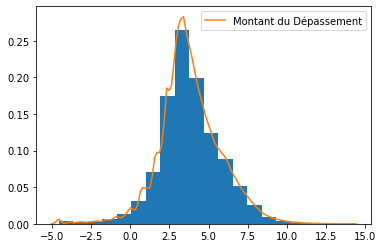

In [10]:
plt.hist(depacement, bins=20, density=True)
sns.kdeplot(depacement)
plt.show()

In [11]:
# On regroupe les dépassements par région
depacement = df[["Région de Résidence du Bénéficiaire", "Montant du Dépassement"]]

depacement = depacement.groupby("Région de Résidence du Bénéficiaire").sum()

df_pop_total = df_population[["PopulationTotal"]]
df_pop_total

,PopulationTotal
Régions,
Auvergne-Rhône-Alpes,7992341
Bourgogne-Franche-Comté,2804285
Bretagne,3323355
Centre-Val de Loire,2571632
Corse,336469
Grand Est,5533558
Hauts-de-France,5992082
Ile-de-France,12183893
Normandie,3326567


In [12]:
df_medecin_per_pop = df_pop_total.join(df_medecin)
# Compute density

cols = df_medecin_per_pop.columns.tolist()
cols.remove("PopulationTotal")

for col in cols :
    df_medecin_per_pop[col]/=df_medecin_per_pop["PopulationTotal"]*0.00001 #1 pour 100 000

df_medecin_depacement = df_medecin_per_pop.join(depacement)[["Spécialistes","Généralistes","Montant du Dépassement","PopulationTotal"]]




In [13]:
df_medecin_depacement["Medecins pour 100.000 personnes"] = df_medecin_depacement["Spécialistes"] + df_medecin_depacement["Généralistes"]
df_medecin_depacement["Depacement pour 100.000 personnes"] = (100000*df_medecin_depacement["Montant du Dépassement"] / df_medecin_depacement["PopulationTotal"])
#df_medecin_depacement["Depacement par medecin"] = df_medecin_depacement["Montant du Dépassement"] / (df_medecin_depacement["Spécialistes"] + df_medecin_depacement["Généralistes"])
                                                              
df_medecin_depacement = df_medecin_depacement.dropna()
df_medecin_depacement

,Spécialistes,Généralistes,Montant du Dépassement,PopulationTotal,Medecins pour 100.000 personnes,Depacement pour 100.000 personnes
Régions,,,,,,
Auvergne-Rhône-Alpes,283.546460,192.621911,19318417.65,7992341,476.168372,241711.629296
Bourgogne-Franche-Comté,266.128443,174.482979,4907967.81,2804285,440.611421,175016.726545
Bretagne,245.565099,185.806211,4461786.01,3323355,431.371310,134255.474062
Centre-Val de Loire,209.827845,149.904808,4264096.58,2571632,359.732652,165812.860471
Grand Est,268.236097,177.824105,13332138.69,5533558,446.060202,240932.483043
Hauts-de-France,245.657519,171.292716,7789817.85,5992082,416.950235,130001.856617
Ile-de-France,378.672071,192.385143,34901311.24,12183893,571.057215,286454.512035
Normandie,237.061211,168.882815,4881114.37,3326567,405.944026,146731.280927
Nouvelle-Aquitaine,277.242648,198.757531,10506868.19,5973107,476.000179,175902.895930


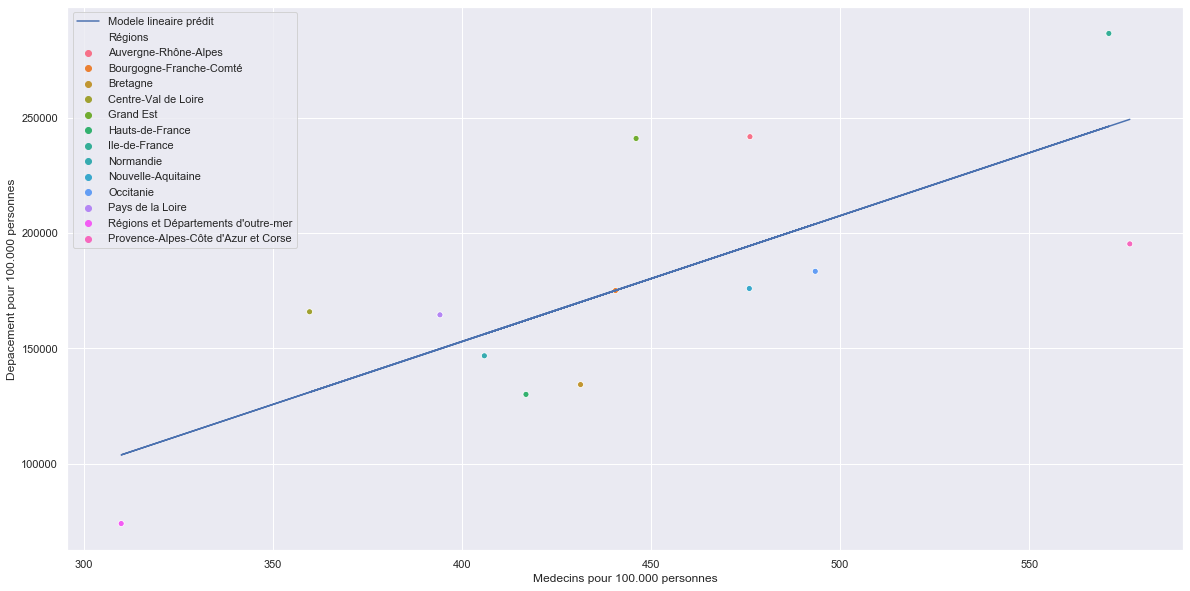

In [39]:
#Calcul de la droite de régression
reg = LinearRegression()
reg.fit(df_medecin_depacement[["Medecins pour 100.000 personnes"]], df_medecin_depacement["Depacement pour 100.000 personnes"])

predict = reg.predict(df_medecin_depacement[["Medecins pour 100.000 personnes"]])

fig, ax = plt.subplots()
fig.figsize = [20, 10]
plt.plot(df_medecin_depacement["Medecins pour 100.000 personnes"], predict, label="Modele lineaire prédit")
g = sns.scatterplot(df_medecin_depacement["Medecins pour 100.000 personnes"], df_medecin_depacement["Depacement pour 100.000 personnes"], hue=df_medecin_depacement.index, ax=ax)
plt.show()


In [152]:
# Chargement des données globalisées et consolidées d'Ameli

excel = pd.ExcelFile("data/Honoraires_totaux_des_professionnels_de_sante_par_region_en_2017.xls")

total_spe = pd.read_excel(excel, "Spécialistes")
total_gen = pd.read_excel(excel, "Généralistes et MEP")

# On renomme les champs "XX- "

def clean(df, col):
    df[col] = df[col].str.replace(r"[0-9]+- ", "")
    

total_gen["Généralistes et compétences MEP"] = total_gen["Généralistes et compétences MEP"].str.replace(r"[0-9]+- ","")
total_gen["REGION INSEE"] = total_gen["REGION INSEE"].str.replace(r"[0-9]+- ","")

total_spe["REGION INSEE"] = total_spe["REGION INSEE"].str.replace(r"[0-9]+- ","")
total_spe["Spécialistes"] = total_spe["Spécialistes"].str.replace(r"[0-9]+- ","")

total_gen["REGION INSEE"] = total_gen["REGION INSEE"].str.replace("TOTAL OUTRE-MER","Régions et Départements d'outre-mer")
total_spe["REGION INSEE"] = total_spe["REGION INSEE"].str.replace("TOTAL OUTRE-MER","Régions et Départements d'outre-mer")
#Régions et Départements d'outre-mer

# On renomme les régions pour être equivalent avec le tableau de la population

print(total_spe["REGION INSEE"].unique())


regions_rename = {'Ile-de-France':'Ile-de-France', 'Centre-Val-de-Loire':'Centre-Val de Loire','Bourgogne et Franche-Comté':'Bourgogne-Franche-Comté',
 'Normandie':'Normandie', 'Hauts-de-France':'Hauts-de-France', 'Grand-Est':'Grand Est', 'Pays-de-Loire':'Pays de la Loire','Bretagne':'Bretagne',
 'Nouvelle Aquitaine':'Nouvelle-Aquitaine', 'Occitanie':'Occitanie','Auvergne et Rhône-Alpes':'Auvergne-Rhône-Alpes',
 "Provence-Alpes-Côte d'Azur":"Provence-Alpes-Côte d'Azur", 'Corse':'Corse',
 "Régions et Départements d'outre-mer":"Régions et Départements d'outre-mer",
 'TOTAL FRANCE METROPOLITAINE':'TOTAL FRANCE METROPOLITAINE',
 'Guadeloupe':'Guadeloupe', 'Martinique':'Martinique', 'Guyane':'Guyane', 'Réunion':'Réunion', 'Mayotte':'Mayotte',
 "Régions et Départements d'outre-mer":"Régions et Départements d'outre-mer", 'TOTAL France ENTIERE':'TOTAL France ENTIERE'}
total_gen = total_gen[~total_gen["REGION INSEE"].str.contains("TOTAL")]

total_gen["REGION INSEE"] = total_gen["REGION INSEE"].apply(lambda x: regions_rename[x])






total_gen = total_gen[total_gen["EFFECTIFS"]!=0]
total_gen = total_gen.rename(columns={"Généralistes et compétences MEP":"Type"})

total_gen = total_gen[~total_gen["Type"].str.contains("TOTAL")]
total_gen = total_gen[~total_gen["REGION INSEE"].str.contains("TOTAL")]

total_gen = total_gen[total_gen["HONORAIRES SANS DEPASSEMENT (Euros)"]!="nc"]
total_gen["HONORAIRES SANS DEPASSEMENT (Euros)"] = pd.to_numeric(total_gen["HONORAIRES SANS DEPASSEMENT (Euros)"])
total_gen = total_gen[total_gen["DEPASSEMENTS (Euros)"]!="nc"]
total_gen["DEPASSEMENTS (Euros)"] = pd.to_numeric(total_gen["DEPASSEMENTS (Euros)"])
total_gen = total_gen[total_gen["FRAIS DE DEPLACEMENT (Euros)"]!="nc"]
total_gen["FRAIS DE DEPLACEMENT (Euros)"] = pd.to_numeric(total_gen["FRAIS DE DEPLACEMENT (Euros)"])
total_gen = total_gen[total_gen["TOTAL DES HONORAIRES (Euros)"]!="nc"]
total_gen["TOTAL DES HONORAIRES (Euros)"] = pd.to_numeric(total_gen["TOTAL DES HONORAIRES (Euros)"])


# On ajoute une colonne de TOTAUX Generaliste

sum_gen = total_gen.groupby(['REGION INSEE']).sum()
sum_gen["Type"] = "Total Généralistes"
sum_gen = sum_gen.reset_index()


total_gen = total_gen.append(sum_gen)
print(total_gen)



#print(total_gen)

total_spe["EFFECTIFS"] = total_spe["EFFECTIFS"].astype(str).str.replace("-", "", regex=True).str.replace("nan", "")
total_spe["EFFECTIFS"] = total_spe["EFFECTIFS"].dropna()

total_spe["EFFECTIFS"] = pd.to_numeric(total_spe["EFFECTIFS"])
total_spe = total_spe.dropna()
total_spe["EFFECTIFS"] = total_spe["EFFECTIFS"].astype("int64")

total_spe = total_spe.rename(columns={"Spécialistes":"Type"})

total_spe = total_spe[total_spe["EFFECTIFS"]!=0]

total_spe["HONORAIRES SANS DEPASSEMENT (Euros)"] = total_spe["HONORAIRES SANS DEPASSEMENT (Euros)"].str.strip()

total_spe = total_spe[total_spe["HONORAIRES SANS DEPASSEMENT (Euros)"]!="nc"]
total_spe["HONORAIRES SANS DEPASSEMENT (Euros)"] = pd.to_numeric(total_spe["HONORAIRES SANS DEPASSEMENT (Euros)"])
total_spe = total_spe[total_spe["DEPASSEMENTS (Euros)"]!="nc"]
total_spe["DEPASSEMENTS (Euros)"] = pd.to_numeric(total_spe["DEPASSEMENTS (Euros)"])
total_spe = total_spe[total_spe["FRAIS DE DEPLACEMENT (Euros)"]!="nc"]
total_spe["FRAIS DE DEPLACEMENT (Euros)"] = pd.to_numeric(total_spe["FRAIS DE DEPLACEMENT (Euros)"])
total_spe = total_spe[total_spe["TOTAL DES HONORAIRES (Euros)"]!="nc"]
total_spe["TOTAL DES HONORAIRES (Euros)"] = pd.to_numeric(total_spe["TOTAL DES HONORAIRES (Euros)"])
total_spe["REGION INSEE"] = total_spe["REGION INSEE"].apply(lambda x: regions_rename[x])

sum_spe = total_spe.groupby(['REGION INSEE']).sum()
sum_spe["Type"] = "Total Spécialistes"
sum_spe = sum_spe.reset_index()


total_spe = total_spe.append(sum_spe)
print(total_spe)


['Ile-de-France' 'Centre-Val-de-Loire' 'Bourgogne et Franche-Comté'
 'Normandie' 'Hauts-de-France' 'Grand-Est' 'Pays-de-Loire' 'Bretagne'
 'Nouvelle Aquitaine' 'Occitanie' 'Auvergne et Rhône-Alpes'
 "Provence-Alpes-Côte d'Azur" 'Corse' 'TOTAL FRANCE METROPOLITAINE'
 'Guadeloupe' 'Martinique' 'Guyane' 'Réunion' 'Mayotte'
 "Régions et Départements d'outre-mer" 'TOTAL France ENTIERE' nan]
    DEPASSEMENTS (Euros)  EFFECTIFS  FRAIS DE DEPLACEMENT (Euros)  \
0               74730805       7503                        483091   
1                2630458       1741                       1245218   
2                1896311       2128                       2238480   
3                2061823       2508                       1184231   
4                3302013       4822                       2308652   
..                   ...        ...                           ...   
14              19523679      12621                      11215165   
15              17169049       6602                       1

C:\Users\martinez\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [153]:
#total_gen.set_index(["REGION INSEE","Généralistes et compétences MEP"])

melted = df_medecin_per_pop.reset_index()
melted = melted.melt(id_vars=['Régions', 'PopulationTotal'], var_name='medecins')


total_med = pd.concat([total_gen,total_spe])
total_med



,DEPASSEMENTS (Euros),EFFECTIFS,FRAIS DE DEPLACEMENT (Euros),HONORAIRES SANS DEPASSEMENT (Euros),REGION INSEE,TOTAL DES HONORAIRES (Euros),Type
0,7.473080e+07,7503,483091.00,1.102235e+09,Ile-de-France,1.177449e+09,Médecine générale
1,2.630458e+06,1741,1245218.00,2.804830e+08,Centre-Val de Loire,2.843587e+08,Médecine générale
2,1.896311e+06,2128,2238480.00,3.291999e+08,Bourgogne-Franche-Comté,3.333347e+08,Médecine générale
3,2.061823e+06,2508,1184231.00,4.077368e+08,Normandie,4.109829e+08,Médecine générale
4,3.302013e+06,4822,2308652.00,8.830060e+08,Hauts-de-France,8.886167e+08,Médecine générale
...,...,...,...,...,...,...,...
16,8.707044e+08,28093,3045498.79,0.000000e+00,Provence-Alpes-Côte d'Azur,6.534630e+09,Total Spécialistes
17,7.438457e+07,5237,1360159.00,0.000000e+00,Régions et Départements d'outre-mer,1.451730e+09,Total Spécialistes
18,2.343190e+07,2155,149744.00,0.000000e+00,Réunion,6.292551e+08,Total Spécialistes
19,1.025726e+10,250637,38494439.36,0.000000e+00,TOTAL FRANCE METROPOLITAINE,6.434694e+10,Total Spécialistes


In [154]:




#melted = df_medecin_per_pop.melt(id_vars='Régions', var_name='medecins')
merged = df_population.merge(total_med, right_on=["REGION INSEE"], left_on=["Régions"])
# Correction de la colone de dépassement
merged["DEPASSEMENTS (Euros)"] = merged["DEPASSEMENTS (Euros)"].astype(str).str.replace("nc", "", regex=True).str.strip()
merged["DEPASSEMENTS (Euros)"] = pd.to_numeric(merged["DEPASSEMENTS (Euros)"])
merged = merged.dropna()

merged = merged.rename(columns={"REGION INSEE": "Régions"})
merged["Depassements pour 100 000"] = 100000* merged["DEPASSEMENTS (Euros)"]/merged["PopulationTotal"]
merged["Depassements par médecin"] = merged["DEPASSEMENTS (Euros)"] / (merged["EFFECTIFS"])
merged["Médecins pour 100 000"] = 100000* merged["EFFECTIFS"] / merged["PopulationTotal"]

merged = merged[~merged["Type"].str.contains("TOTAL")]


# On merge avec les âges par régions
df_pop = df_population.reset_index()
#merged = merged.merge(df_pop, )

In [155]:
merged

,0 ŕ 19 ans,20 ŕ 39 ans,40 ŕ 59 ans,60 ŕ 74 ans,75 ans et plus,PopulationTotal,DEPASSEMENTS (Euros),EFFECTIFS,FRAIS DE DEPLACEMENT (Euros),HONORAIRES SANS DEPASSEMENT (Euros),Régions,TOTAL DES HONORAIRES (Euros),Type,Depassements pour 100 000,Depassements par médecin,Médecins pour 100 000
0,1949046,1912446,2091568,1300940,738341,7992341,19745090.0,6511,4133712.0,904275157.0,Auvergne-Rhône-Alpes,9.281540e+08,Médecine générale,2.470501e+05,3032.574105,81.465493
1,1949046,1912446,2091568,1300940,738341,7992341,11079568.0,721,190565.0,91835631.0,Auvergne-Rhône-Alpes,1.031058e+08,M.E.P.,1.386273e+05,15366.945908,9.021137
2,1949046,1912446,2091568,1300940,738341,7992341,30824657.0,7232,4324277.0,996110788.0,Auvergne-Rhône-Alpes,1.031260e+09,OMNIPRATICIENS,3.856775e+05,4262.258988,90.486630
3,1949046,1912446,2091568,1300940,738341,7992341,390183.0,12,676.0,820187.0,Auvergne-Rhône-Alpes,1.211046e+06,Homéopathie,4.881961e+03,32515.250000,0.150144
4,1949046,1912446,2091568,1300940,738341,7992341,321164.0,21,0.0,2364408.0,Auvergne-Rhône-Alpes,2.685573e+06,Allergologie,4.018397e+03,15293.523810,0.262752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,711923,499364,572324,267438,114598,2165647,95655.0,14,1943.0,2332179.0,Régions et Départements d'outre-mer,2.429777e+06,Acupuncture et Médecine Générale,4.416925e+03,6832.500000,0.646458
714,711923,499364,572324,267438,114598,2165647,105430.0,18,0.0,3644826.0,Régions et Départements d'outre-mer,3.750256e+06,Angiologie et Médecine Générale,4.868291e+03,5857.222222,0.831160
715,711923,499364,572324,267438,114598,2165647,70790.0,13,10820.0,1581056.0,Régions et Départements d'outre-mer,1.662666e+06,Homéopathie et Médecine Générale,3.268769e+03,5445.384615,0.600283
716,711923,499364,572324,267438,114598,2165647,3233025.0,3283,2732227.0,684847871.0,Régions et Départements d'outre-mer,6.908131e+08,Total Généralistes,1.492868e+05,984.777642,151.594420


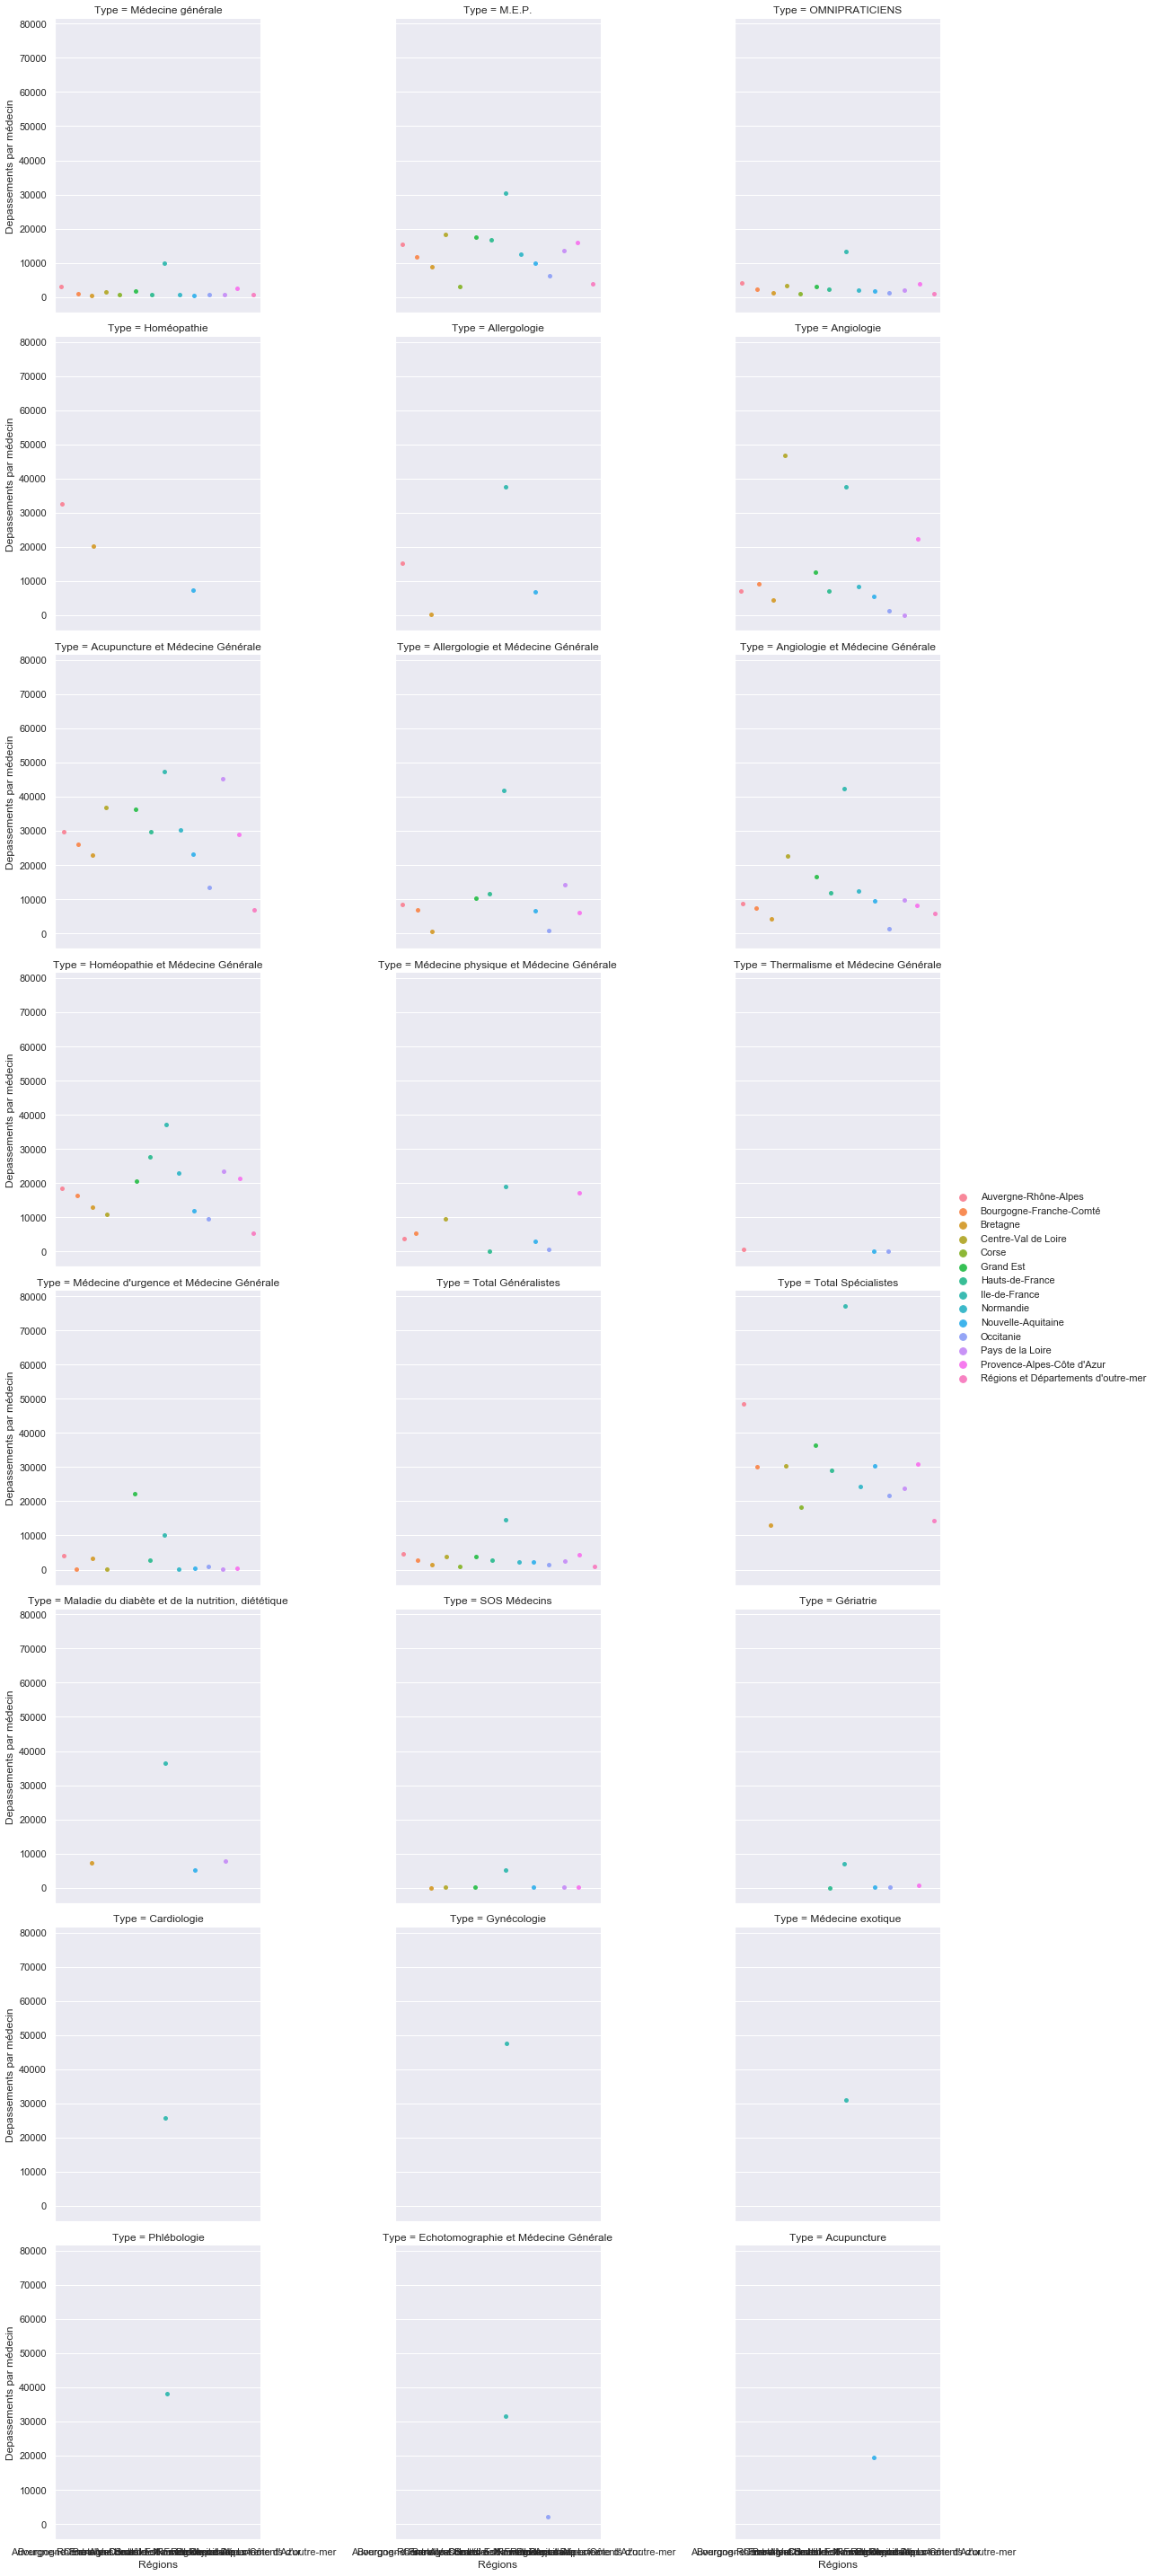

In [156]:
g = sns.catplot(x="Régions", y="Depassements par médecin", hue="Régions",col_wrap=3,
                col="Type", data=merged, height=5)

g.add_legend()

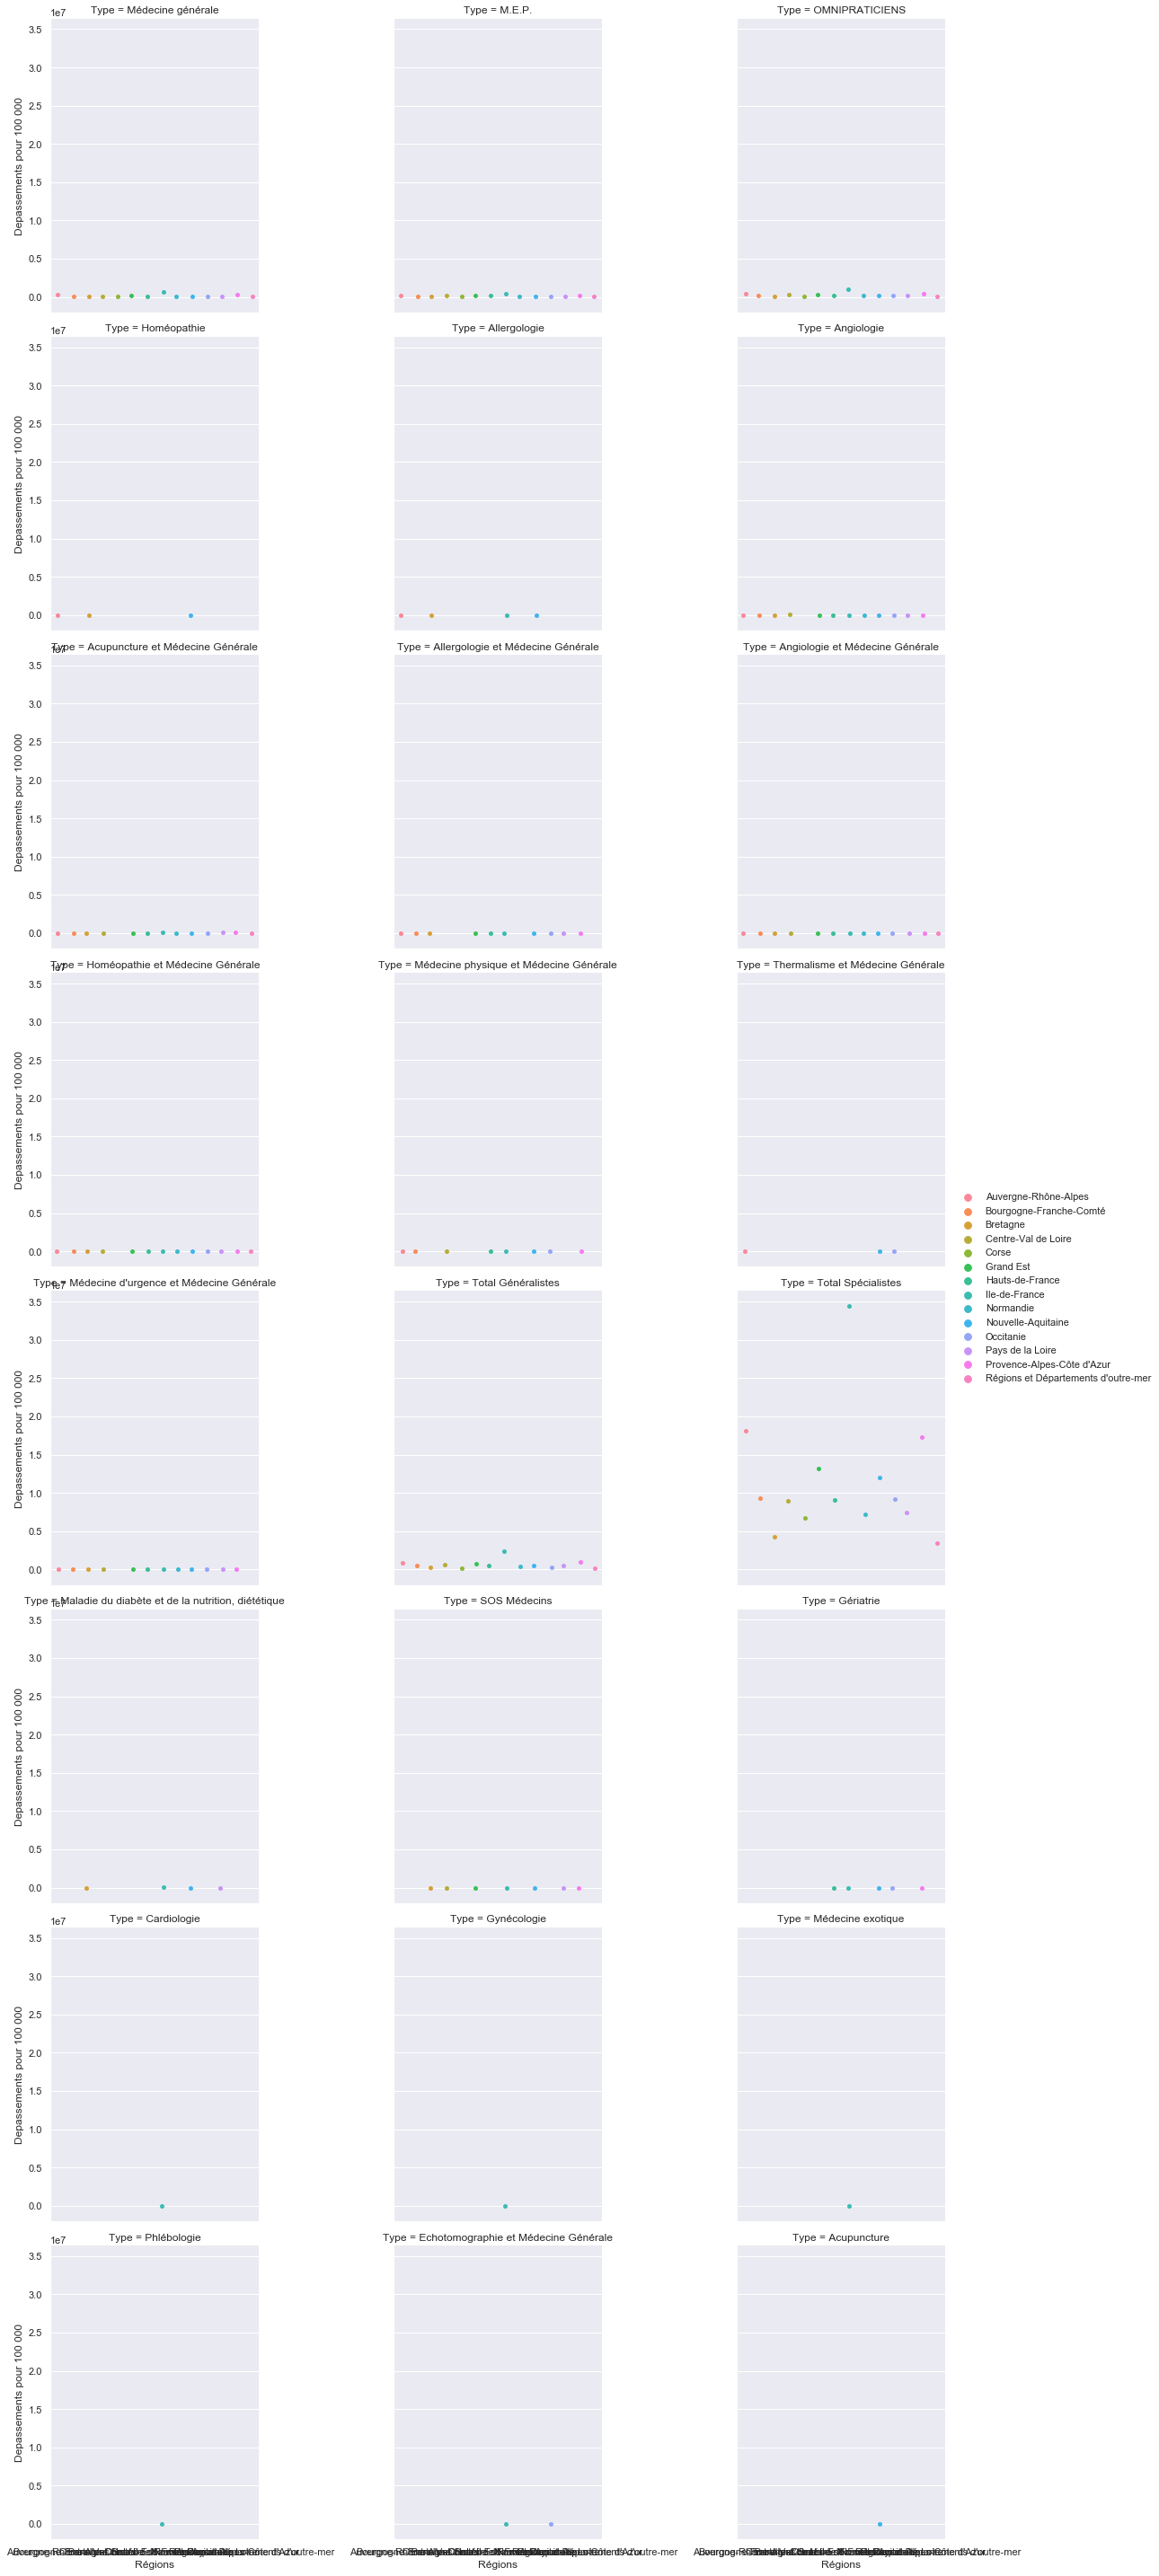

In [157]:

g = sns.catplot(x="Régions", y="Depassements pour 100 000", hue="Régions",col_wrap=3,
                col="Type", data=merged, height=5)
g.add_legend()


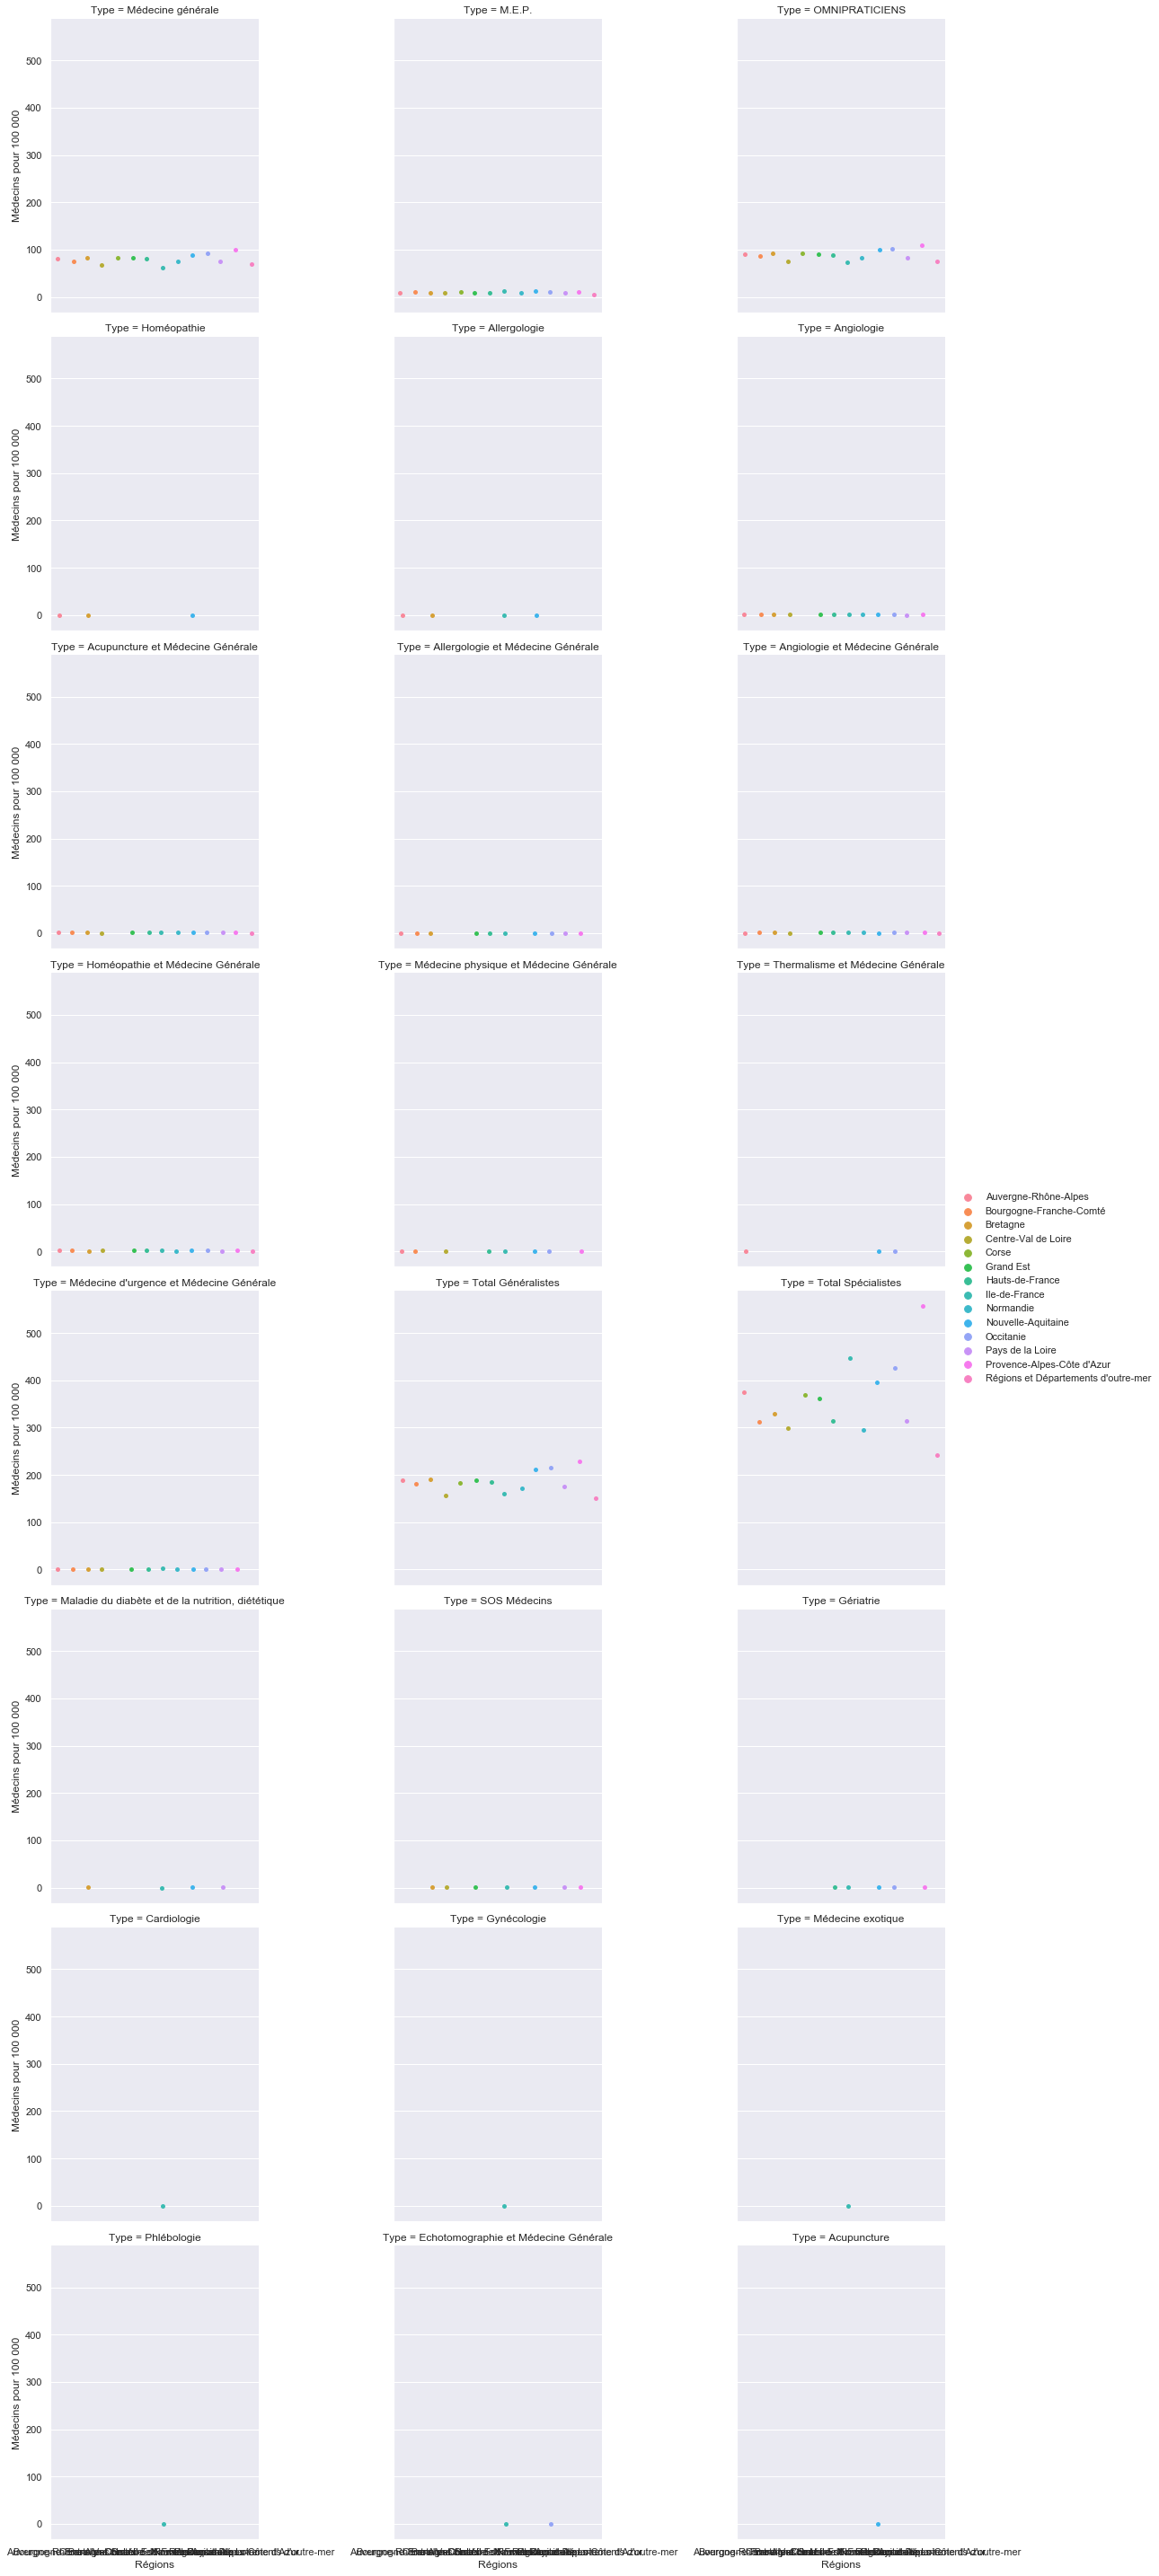

In [158]:
g = sns.catplot(x="Régions", y="Médecins pour 100 000", hue="Régions",col_wrap=3,
                col="Type", data=merged, height=5)
g.add_legend()

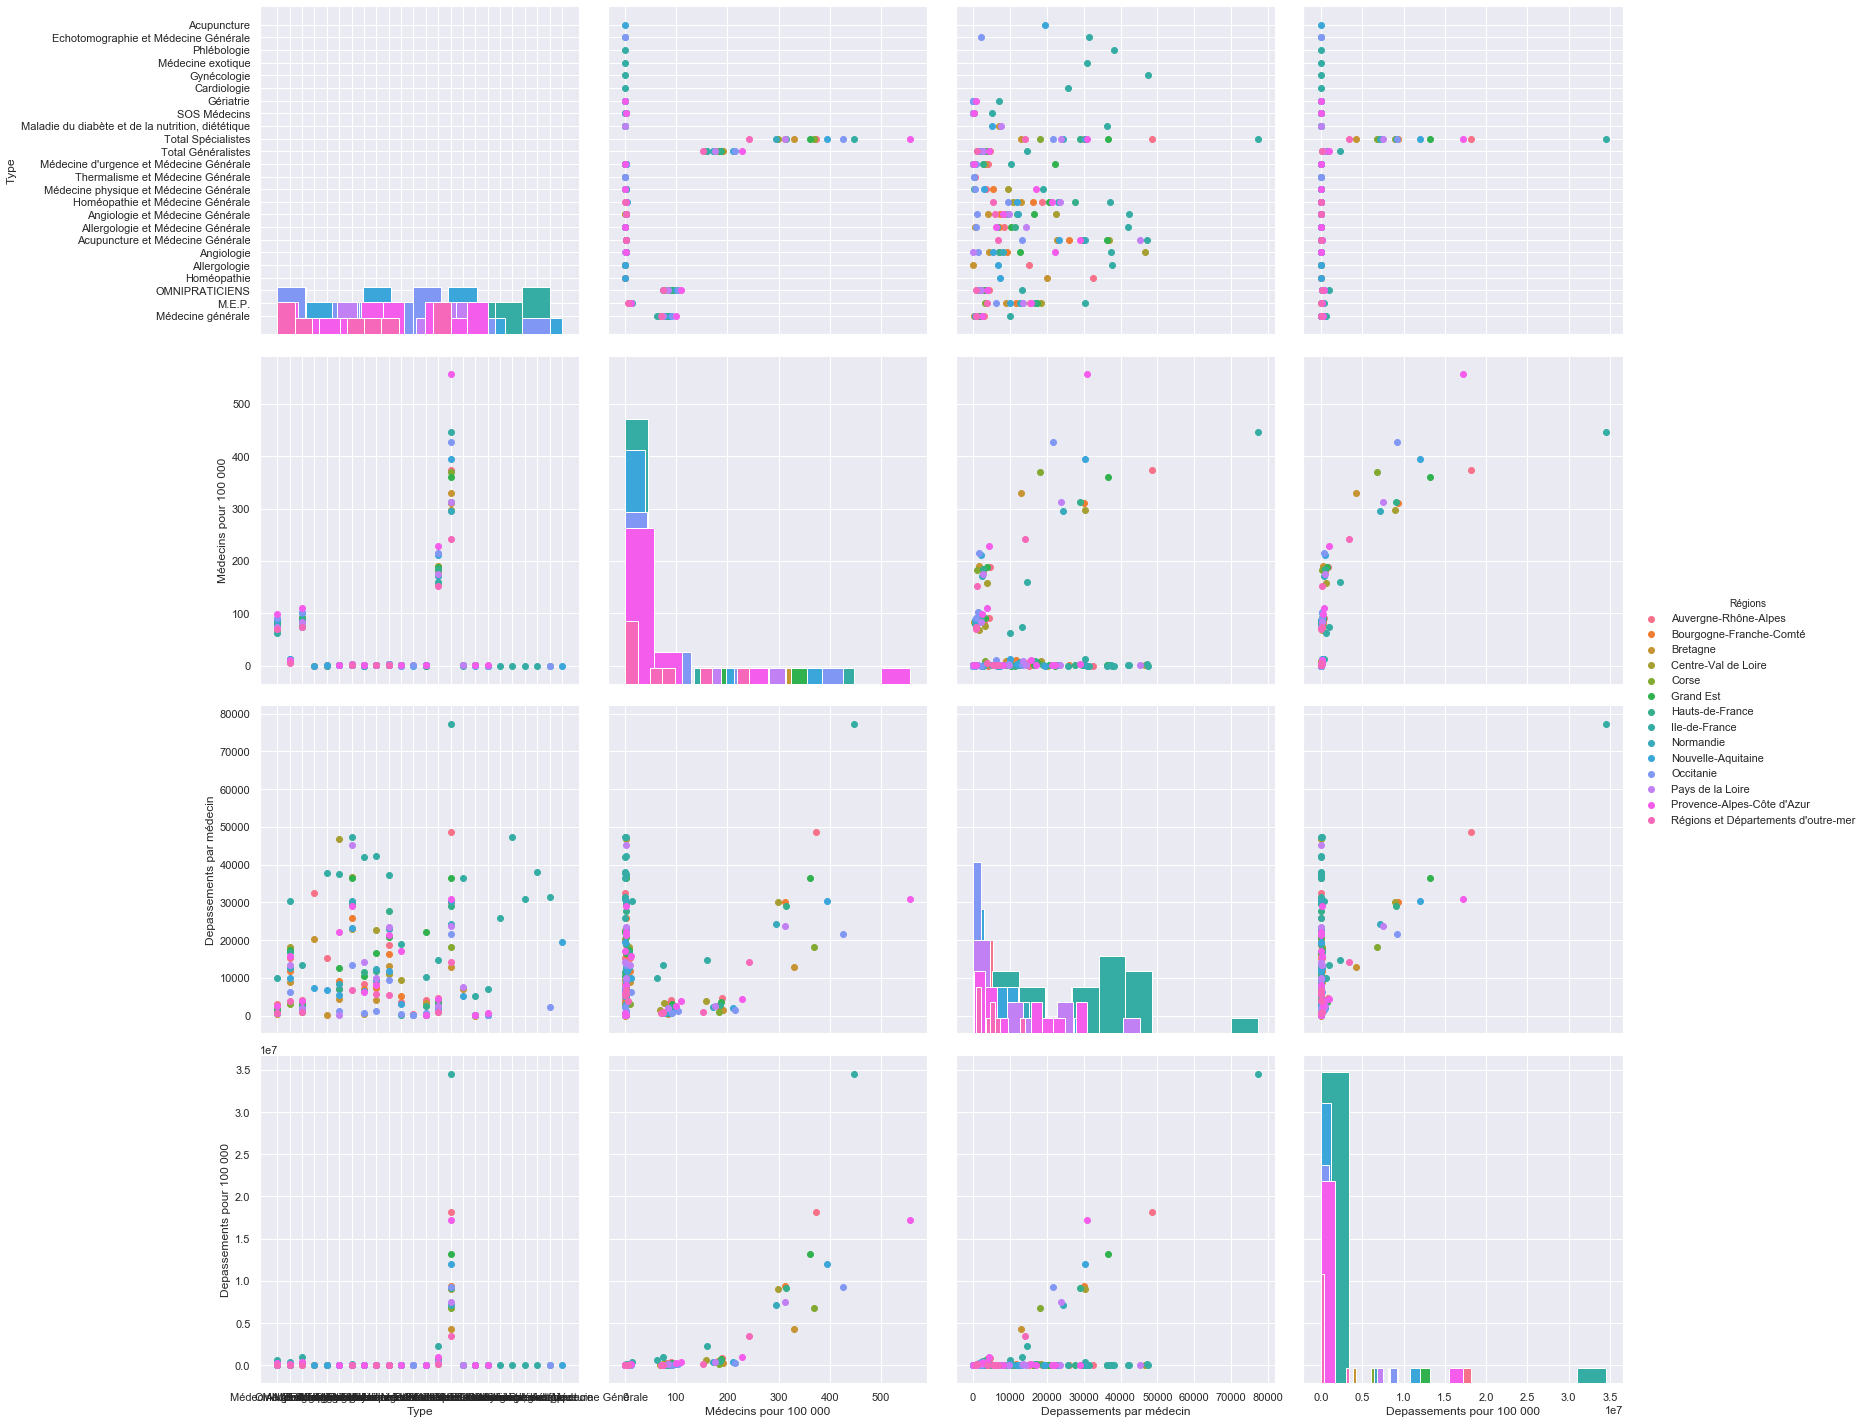

In [159]:
#g = sns.FacetGrid(merged, col="medecins", col_wrap=2, hue="Régions")
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]
g = sns.PairGrid(merged, hue="Régions", vars=["Type","Médecins pour 100 000", "Depassements par médecin", "Depassements pour 100 000"], height=5)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()
#g = g.map(plt.scatter)

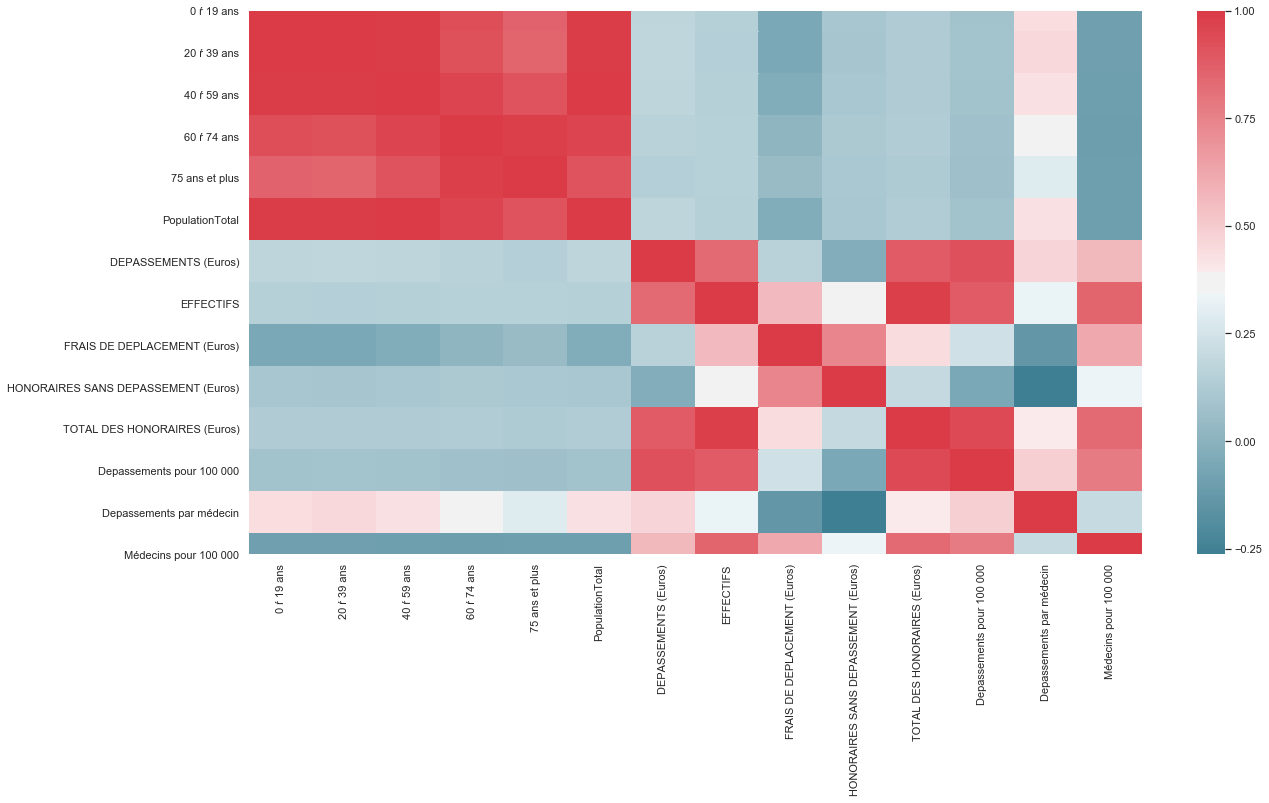

In [160]:

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(merged.corr(), cmap=cmap)


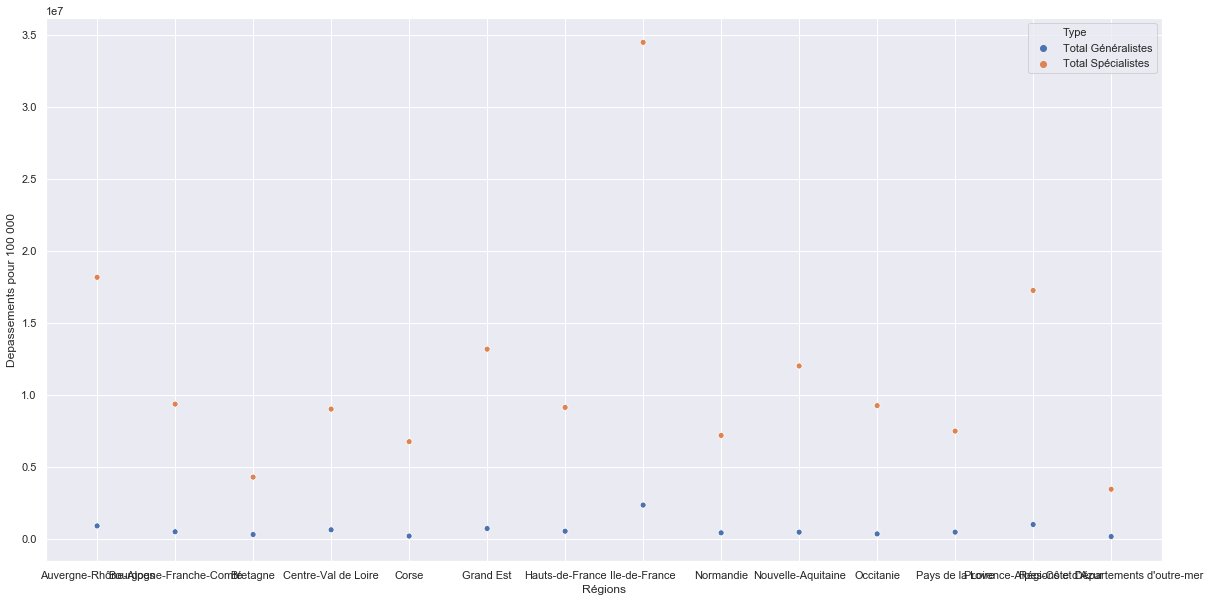

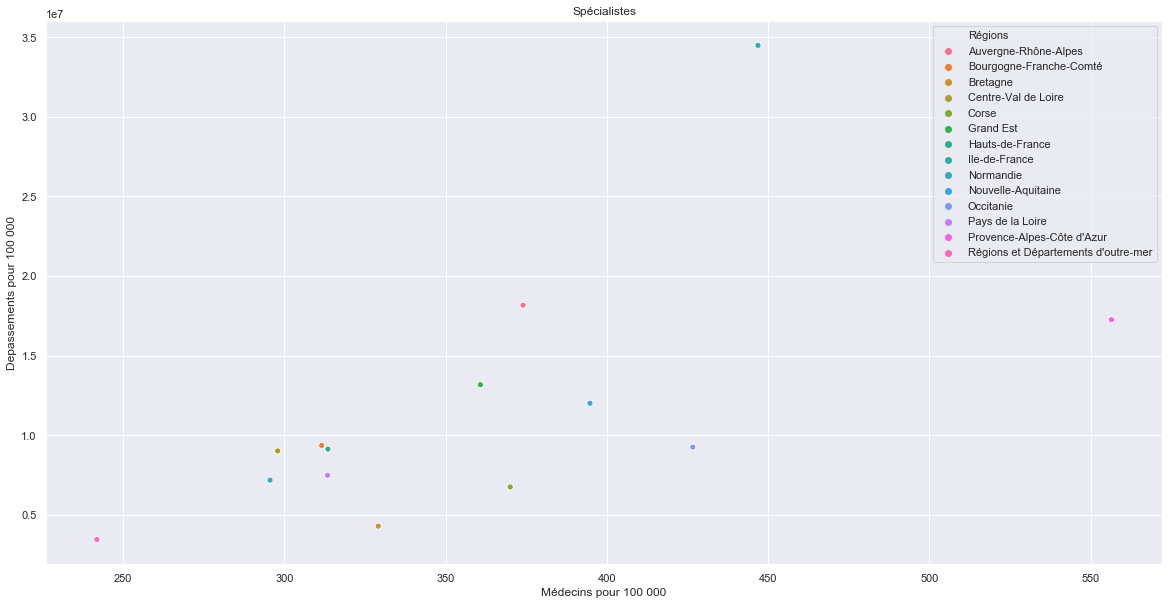

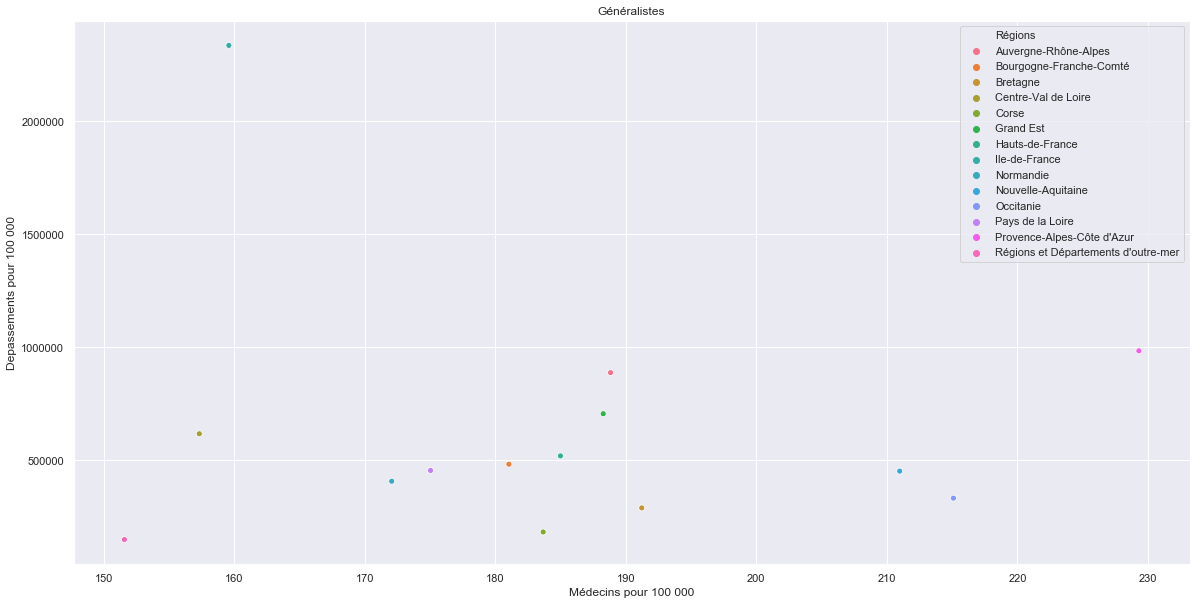

,0 ŕ 19 ans,20 ŕ 39 ans,40 ŕ 59 ans,60 ŕ 74 ans,75 ans et plus,PopulationTotal,DEPASSEMENTS (Euros),EFFECTIFS,FRAIS DE DEPLACEMENT (Euros),HONORAIRES SANS DEPASSEMENT (Euros),Régions,TOTAL DES HONORAIRES (Euros),Type,Depassements pour 100 000,Depassements par médecin,Médecins pour 100 000
61,1949046,1912446,2091568,1300940,738341,7992341,1.451364e+09,29892,4441034.62,0.0,Auvergne-Rhône-Alpes,7.574565e+09,Total Spécialistes,1.815944e+07,48553.606416,374.008066
110,641808,605603,733029,522342,301503,2804285,2.621975e+08,8737,2390857.90,0.0,Bourgogne-Franche-Comté,2.240138e+09,Total Spécialistes,9.349887e+06,30010.011132,311.558918
163,783367,720621,873842,600862,344663,3323355,1.422076e+08,10937,1788078.81,0.0,Bretagne,2.606136e+09,Total Spécialistes,4.279037e+06,13002.431837,329.095146
212,607944,548438,675546,465986,273718,2571632,2.315939e+08,7661,1295336.91,0.0,Centre-Val de Loire,2.121108e+09,Total Spécialistes,9.005716e+06,30230.239235,297.904210
236,68240,76089,92089,61864,38187,336469,2.268502e+07,1245,2236798.00,0.0,Corse,3.155094e+08,Total Spécialistes,6.742084e+06,18220.902008,370.019229
292,1281846,1306290,1484449,945159,515814,5533558,7.285592e+08,19963,3989271.68,0.0,Grand Est,5.379225e+09,Total Spécialistes,1.316620e+07,36495.478814,360.762461
350,1555986,1461811,1550658,954602,469025,5992082,5.465926e+08,18784,2486213.51,0.0,Hauts-de-France,5.335346e+09,Total Spécialistes,9.121914e+06,29098.838401,313.480356
422,3135508,3410006,3206998,1610533,820848,12183893,4.201241e+09,54445,1548080.01,0.0,Ile-de-France,1.392545e+10,Total Spécialistes,3.448192e+07,77164.855759,446.860457
469,801195,738794,866165,594330,326083,3326567,2.386281e+08,9831,1274721.13,0.0,Normandie,2.682841e+09,Total Spécialistes,7.173404e+06,24273.023678,295.529896
533,1304945,1280147,1581603,1135691,670721,5973107,7.167470e+08,23579,7376297.87,0.0,Nouvelle-Aquitaine,5.929307e+09,Total Spécialistes,1.199957e+07,30397.684900,394.752681


In [181]:
fig, ax = plt.subplots()
fig.figsize = [20, 10]
gen_spe = merged[(merged["Type"]=="Total Généralistes")|(merged["Type"]=="Total Spécialistes")]
gen = merged[(merged["Type"]=="Total Généralistes")]
spe = merged[(merged["Type"]=="Total Spécialistes")]
g = sns.scatterplot(gen_spe["Régions"], gen_spe["Depassements pour 100 000"], hue=gen_spe["Type"], ax=ax)
plt.show()
fig.figsize = [20, 10]


plt.subplots()
g = sns.scatterplot(spe["Médecins pour 100 000"], spe["Depassements pour 100 000"], hue=spe["Régions"])
plt.title("Spécialistes")
plt.show()


g = sns.scatterplot(gen["Médecins pour 100 000"], gen["Depassements pour 100 000"], hue=gen["Régions"])
plt.title("Généralistes")
plt.show()

